In [1]:
import os
import mpbn
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

work_dir = '/home/spankaew/Git/benchmark-dynamical-models/'
project = 'toy_reprogramming_1'
model_dir = work_dir + 'files/02_model_synthesis/' + project + '/'
output_dir = work_dir + 'files/03_trajectory_simulations/' + project + '/'

In [2]:
def clause_string(logic):
    logic_rules = []
    for i in range(len(logic)):
        logic_clause = logic[i].copy()
        formatted_strings = [f"{t[0]}" if t[1] else f"!{t[0]}" for t in logic_clause]
        single_line_string = ' & '.join(formatted_strings)
        logic_rules.append(single_line_string)
    return(logic_rules)

def dataframe_model_dnf(model_dnf):
    node_names = list(model_dnf.keys())
    logic_mtx = pd.DataFrame()
    for i in node_names:
        logic_mtx = pd.concat([logic_mtx,pd.DataFrame(clause_string(model_dnf[i]))], 
                        axis = 1, ignore_index = False,)
    logic_mtx = logic_mtx.applymap(lambda x: f"({x})" if isinstance(x, str) else x)    
    logic_mtx=logic_mtx.transpose()
    logic_mtx = logic_mtx.fillna('')
    logic_mtx.index = node_names
    logic_full = logic_mtx.agg(' | '.join, axis=1).str.strip(' | ')
    return(logic_full)

In [ ]:
import os 
from tqdm import tqdm
model_files = os.listdir(model_dir)
model_logic = pd.DataFrame()

for i in tqdm(model_files):
    # Load file
    model = mpbn.load(model_dir + i)
    # Convert to dnf and dnf string
    model = model.as_dnf()
    model = dataframe_model_dnf(model)
    model.name = i.split('.')[0]
    # Concatenate to matrix
    model_logic = pd.concat([model_logic, model], axis = 1, ignore_index = False)

In [235]:
model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)
encoded_df

,AKT1,AKT2,Apoptosis,CDH1,CDH2,CTNNB1,CellCycleArrest,DKK1,DNAdamage,ECMicroenv,EMT,ERK,GF,Invasion,Metastasis,Migration,NICD,SMAD,SNAI1,SNAI2,TGFbeta,TWIST1,VIM,ZEB1,ZEB2,miR200,miR203,miR34,p21,p53,p63,p73
0,20.0,187.0,0.0,3.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,12.0,4.0,0.0,0.0,19.0,1.0,0.0,4.0,28.0,3.0,0.0,0.0,14.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,5.0
1,21.0,14.0,0.0,2.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,1.0,0.0,4.0,29.0,3.0,0.0,0.0,6.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,3.0
2,10.0,161.0,75.0,28.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,69.0,4.0,1.0,0.0,62.0,21.0,0.0,26.0,21.0,3.0,0.0,0.0,72.0,9.0,63.0,0.0,39.0,10.0,13.0,0.0,6.0
3,22.0,24.0,4.0,2.0,0.0,10.0,1.0,0.0,0.0,0.0,1.0,16.0,1.0,2.0,0.0,20.0,1.0,0.0,4.0,29.0,3.0,0.0,0.0,7.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,5.0
4,23.0,14.0,0.0,2.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,19.0,1.0,0.0,4.0,28.0,3.0,0.0,0.0,6.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,19.0,34.0,1.0,3.0,0.0,10.0,1.0,0.0,0.0,0.0,1.0,15.0,4.0,2.0,0.0,19.0,1.0,0.0,4.0,29.0,3.0,0.0,0.0,16.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,5.0
1021,23.0,192.0,0.0,3.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,12.0,4.0,2.0,0.0,19.0,1.0,0.0,4.0,28.0,3.0,0.0,0.0,11.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,5.0
1022,10.0,161.0,13.0,0.0,0.0,16.0,39.0,0.0,0.0,0.0,1.0,43.0,4.0,1.0,0.0,2.0,21.0,0.0,69.0,22.0,3.0,0.0,0.0,72.0,20.0,51.0,1.0,29.0,70.0,67.0,13.0,6.0
1023,26.0,83.0,6.0,3.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,2.0,0.0,19.0,1.0,0.0,4.0,29.0,3.0,0.0,0.0,17.0,8.0,9.0,4.0,60.0,0.0,5.0,0.0,3.0


In [9]:
# Get the list of files in the model folder
model_folder = model_dir
model_files = os.listdir(model_folder)

model_logic = pd.DataFrame()

for i in model_files:
    logic = pd.read_csv(model_folder + i, index_col=0, header = None)
    logic.columns = [i.split('.')[0]]
    model_logic = pd.concat([model_logic, logic], axis = 1, ignore_index=False)
model_logic.index.name = None
model_logic = model_logic.transpose()

In [17]:
model_logic

,G1,G2,G3,G4,G5,G6,G7,G8,G9,TF1,TF2,TF3,TF4,TF5,TF6,TF7
bn3,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2|TF3,!TF1&TF3,TF4,TF5,!TF6,!TF7,0
bn4,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2&TF3,!TF1&TF3,TF4,TF5,!TF6,!TF7,0
bn7,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2|TF3,!TF1&TF3,TF4,TF5,!TF6,!TF7,1
bn5,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2|TF3,!TF1|TF3,TF4,TF5,!TF6,!TF7,1
bn0,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2&TF3,!TF1&TF3,TF4,TF5,!TF6,!TF7,1
bn2,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2&TF3,!TF1|TF3,TF4,TF5,!TF6,!TF7,0
bn6,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2|TF3,!TF1|TF3,TF4,TF5,!TF6,!TF7,0
bn1,TF1,TF1,TF1,TF2,TF2,TF2,TF6,TF6,TF6,!TF2&TF3,!TF1|TF3,TF4,TF5,!TF6,!TF7,1


In [12]:
# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic.columns)
encoded_df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,TF1,TF2,TF3,TF4,TF5,TF6,TF7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


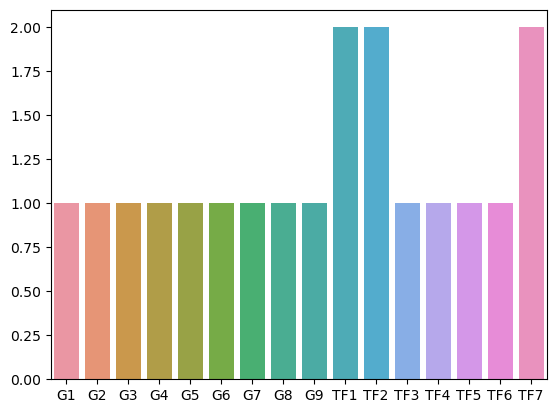

In [16]:
num_var_logic = encoded_df.max()+1

sns.barplot(x = num_var_logic.index, y = num_var_logic)
plt.show()